<a href="https://colab.research.google.com/github/vniranjan26/Haberman_Survival/blob/main/haberman_survival_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haberman's Survival 


### **About the Dataset**

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances (rows): **306**

Number of Attributes (columns): **4**  (including the class attribute and all the attributes have **numeric** values)

**Source :** https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival
### Attribute Information

1. **Age** of patient at time of operation

2. Patient's **year** of operation

3. Number of positive axillary **nodes** detected
<br>(**Positive axillary nodes** means the lymph nodes in the underarm area do contain cancer. <br>These are also the first lymph nodes where breast cancer is likely to spread.)
     
4. Survival **status** (class attribute) 
<br>1 = the patient survived 5 years or longer 
<br>2 = the patient died within 5 year

Missing Attribute Values: None


## 1.1 Objective : 

To Classify a new patient who had undergone breast cancer surgery as Patient will survive more than 5 years or die within 5 years.


In [1]:
#importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 High Level Statistics

In [6]:
#Loading data with column names
column_name = ['Age','Year','Aux_Nodes','Surv_Status']
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1V_jmQE01OZtkcSM1r8_grUoFDLyRmDuk',header = None, names =column_name)

In [7]:
data.head()

,Age,Year,Aux_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
#Q How many data points and features?
print(data.shape)

(306, 4)


In [9]:
data.describe()

,Age,Year,Aux_Nodes,Surv_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
#what are the column names of data?
print(data.columns)

Index(['Age', 'Year', 'Aux_Nodes', 'Surv_Status'], dtype='object')


In [11]:
#how many data points for each class are present ?
data['Surv_Status'].value_counts()

1    225
2     81
Name: Surv_Status, dtype: int64

## 1.3 Univariate Analysis:
Which is most suitable variable to determine the survival status?

### 1.3 Univariate Analysis

#### 1.3.1 PDF PLot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF plot : Age')

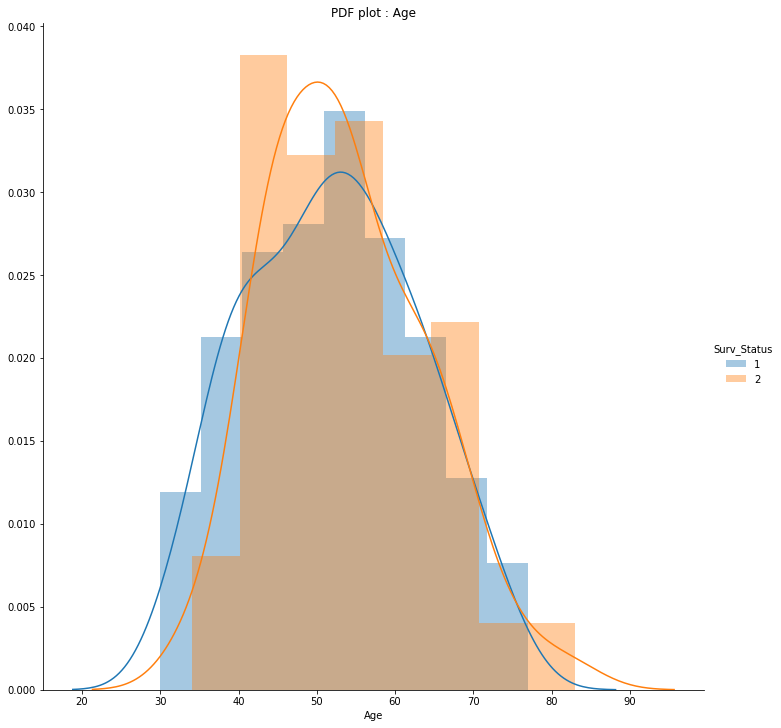

In [13]:
#pdf for age 
sns.FacetGrid(data, hue = 'Surv_Status', height = 10).map(sns.distplot, 'Age').add_legend()
plt.title('PDF plot : Age')

### Observation:

- Patient with age between 30-34 have survived more than 5 years.
- Patient with age 77 to 83 have died within 5 years.
- For the rest of patients, can't conclude anything from the above plot as points are overalapping.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


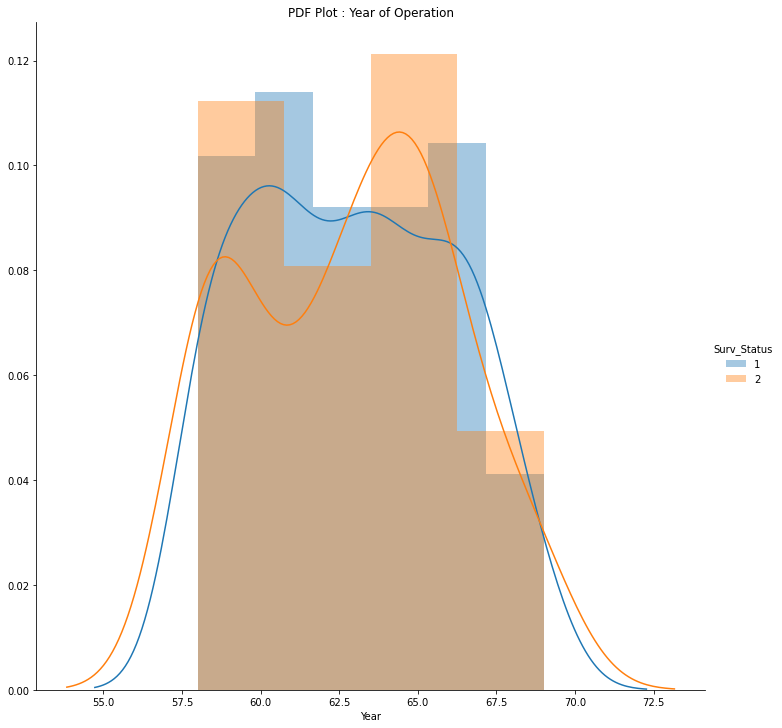

In [14]:
#pdf for operation year

sns.FacetGrid(data, hue = 'Surv_Status', height = 10).map(sns.distplot,'Year').add_legend()
plt.title('PDF Plot : Year of Operation')
plt.show()

### Observation:

- For year, 58-62 Survaival rate is higher compared to Death rate.
- For year 63-67 Death rate is higher than the survival Rate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


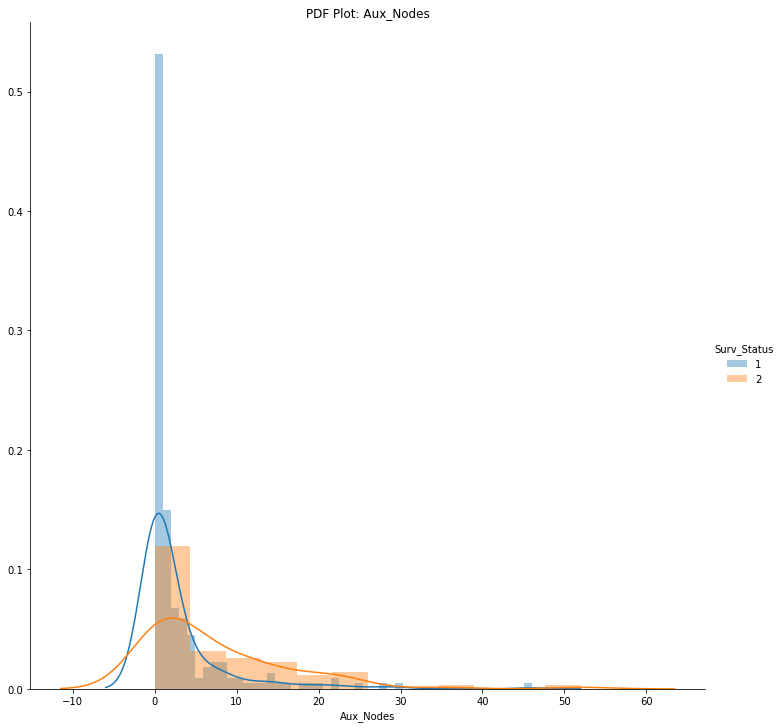

In [15]:
#pdf for Aux nodes 

sns.FacetGrid(data, hue = 'Surv_Status', height = 10).map(sns.distplot,'Aux_Nodes').add_legend()
plt.title('PDF Plot: Aux_Nodes')
plt.show()

### Observation:
- It is clearly visible that Patients not having any auxilary nodes will survive.


#### 1.3.2 Distribution Plot :CDF

In [16]:
# dataframe of patients who survived
survived = data.loc[data['Surv_Status']== 1]
# dataframe of patients who died 
died = data.loc[data['Surv_Status'] == 2]

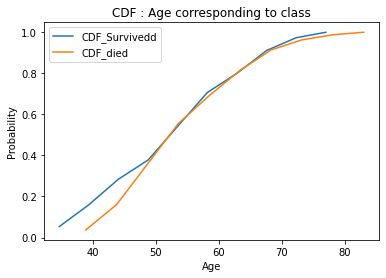

In [17]:
#Age feature corresponing to survived 

counts, bin_edges = np.histogram(survived['Age'], bins = 10, density = True )
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],cdf, label = 'CDF_Survivedd')
plt.xlabel('Age')
plt.title('CDF : Age')

#Age feature corresponing to died 
counts, bin_edges = np.histogram(died['Age'], bins = 10, density = True )
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],cdf, label = 'CDF_died')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('CDF : Age corresponding to class')
plt.legend()
plt.show()

###  Observation:

- 100% patients with age >= 77 have died
- More than 80% Patients with age < 38 have survived.


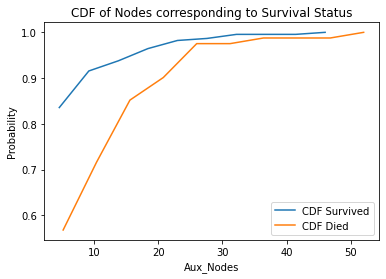

In [18]:
#CDf corresponding to nodes for survived patients

#calculation of cdf
counts, bin_edges = np.histogram(survived['Aux_Nodes'],bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf) 

plt.plot(bin_edges[1:],cdf, label = 'CDF Survived') #plotting CDF
#plt.plot(bin_edges[1:],pdf, label = 'PDF Survived') 
plt.xlabel('Aux_Nodes')
plt.ylabel('Probability')
plt.title('CDF of Nodes corresponding to Survival Status')
plt.legend()

#CDF corresponding to nodes wrt died patients
counts, bin_edges = np.histogram(died['Aux_Nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],cdf, label = 'CDF Died')
#plt.plot(bin_edges[1:],pdf, label = 'PDF Died')
plt.legend()
plt.show()

#### Observation 
- for the patients having less than 5 auxilary nodes the probability of surviving (82%) is higher than the probbility of dying(58%).
- Patients having more than 45 Positive aux Nodes are died.


### 1.3.3 Boxplot

A box plot is a useful way to illustrate the central tendency, variability, and skewness of a distribution and also an excellent way to detect outliers and extreme values.

- box represents the interquartile range(IQR)
- top line in the box is the 75th percentile(3rd quartile)
- center line in the box is the 50th percentile(median). 
- bottom line in the box is the 25th percentile(1st quartile)
- Whiskers extend from the box to the left and right.
- the left and right fences represent the minimum and maximum value.


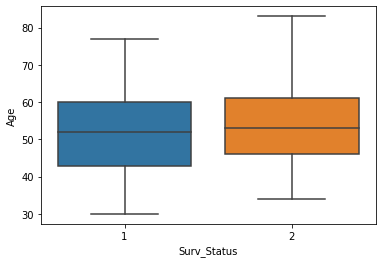

In [19]:
sns.boxplot(x = 'Surv_Status', y = 'Age', data = data)
plt.show()

#### Observation :

- 75% of the age data shows Overlap, We can say there is 100% Survival for patients between age of 43-45.

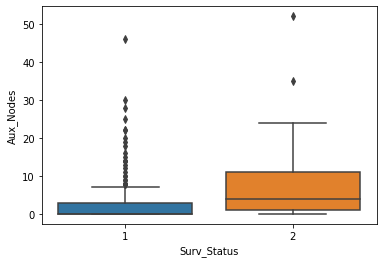

In [20]:
#boxplot of Nodes corresponding to Survival Status 
sns.boxplot(x = 'Surv_Status', y = 'Aux_Nodes', data = data )
plt.show()

#### Observation:

- 50% of Patient who survived more than 5 years have 0 Positive Auxilary nodes.


### 1.3.4 Violin Plot 

- It is similar to a box plot, with the addition of PDF on each side and they look like a voilin, hence named as violin plot
- In a violin plot Denser regions of the data are fatter, and sparser ones are thinner. 


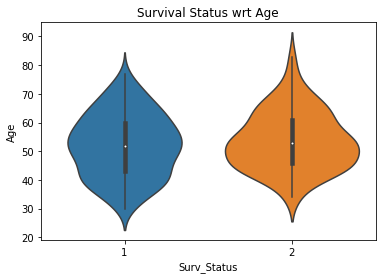

In [21]:
#violin plot of Surv_Status wrt Age
sns.violinplot(x = 'Surv_Status', y = 'Age', data= data, height =5)
plt.title('Survival Status wrt Age')
plt.show()

### Observations:

- Age of patients who died is highly densed between 45 and 55.


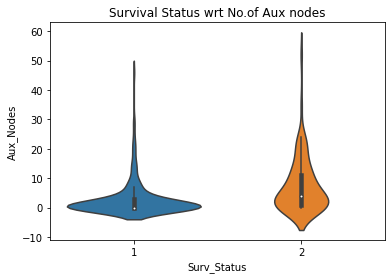

In [22]:
#violin plot of Surv_Status wrt no.of nodes
sns.violinplot(x = 'Surv_Status', y ='Aux_Nodes', data = data)
plt.title('Survival Status wrt No.of Aux nodes')
plt.show()

### Observations:
- Positive axillary nodes of patients who survived more than 5 years is highly densed for 0 to 2 nodes. 
- Positive axillary nodes of patients who died within 5 years is highly densed for 4 to 7 nodes.


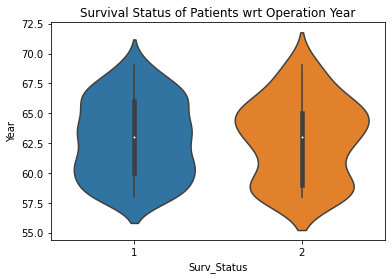

In [23]:
#violin plot wrt Year of Operation

sns.violinplot(x = 'Surv_Status', y = 'Year', data = data )
plt.title('Survival Status of Patients wrt Operation Year')
plt.show()

### Observations:

- Year of operation of patients who survived more than 5 years is highly densed in 1960 
- Year of operation of patients who died within 5 years is highly densed in 1965 



### 1.2 Bivariate Analysis
Bivariate analysis (scatter plots, pair-plots) is performed to understand if combinations of features are useful in classfication.


#### 1.2.1 Scatter Plot

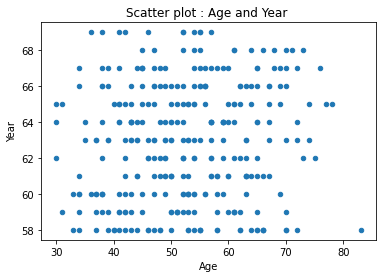

In [24]:
#2-d scatter plot for age and year
data.plot(kind = 'scatter', x = 'Age', y ='Year')
plt.title('Scatter plot : Age and Year ')
plt.show()

### Observation:

- It is difficult to say anythig from this plot as variables ae overlapping and represented with the same color.

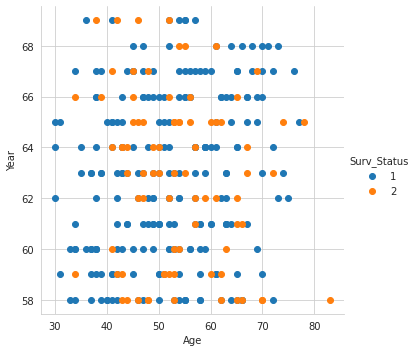

In [25]:
#2d scatter plot for each class with color coding 
sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'Surv_Status',height = 5).map(plt.scatter, 'Age','Year').add_legend()
plt.show()

### Observations :
Now it is easy to differentiate between two variables based on the survival status but this combination of features (**age and year**) are not much useful in classifying the patient, as the points have Overlap.


#### 1.2.2 Pair Plot

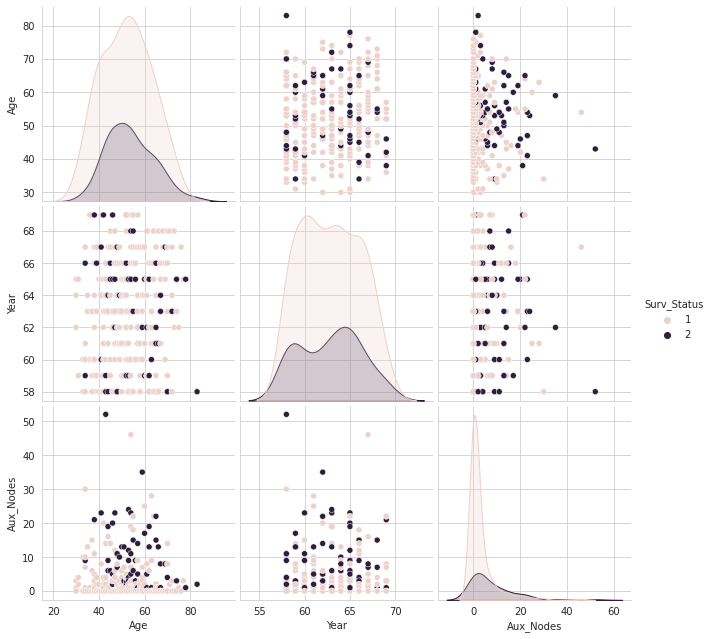

In [26]:
sns.pairplot(data, hue = 'Surv_Status', height = 3)
plt.show()

#### Obervation:

- The histograms in the diagonal shows distribution of single variable, whereas plots on the either side of diagonal shows cobination of 2 variables.
- Patients with the age between 30 to 40 and having lesser number of auxilary nodes seems to be more survived.
- Due to Overlap none of the plots is linearly separable thus not much useful in clssifying patient.

## 3. Conclusion

- As the number of datapoints for both classes are not equal, the data is imbalanced Data set.
- We plotted multiple plots above to classify patient Survival Status.

**Age** :

    if age >= 77, Patient will die within 5 Years
    If age is > 34 and age < 38 Patient will survive for 5 years or longer.

**Year**

    Year does not depicts any valuable inference as it Overlap for both Statuses.

**No.of Positive Auxilary Nodes**

    From all the plots, Aux_nodes clears that Patients having 0 or less number of Aux_nodes have survived 5 years or more.

Since there is much Overlapping in the data points, it is difficult to create simply linerly separable model to decide patients Survival Status based on these 3 features.

But It can be possible to say that, As the number of Age and no.of nodes increses the chances of patient's survival decreases.